In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import torch

from utils.dataloader import ProteinDataset, get_data_loaders
from models.densenet import Atlas_DenseNet

In [41]:
test_submission_path = f"./data/sample_submission.csv"
df = pd.read_csv(test_submission_path)

In [45]:
a = ProteinDataset(df, test=True)

In [47]:
a[0]

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

In [21]:
data = ProteinDataset(imsize=128)

In [22]:
%%timeit
b = data[1]

16 ms ± 249 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
datal = ProteinDataset(imsize=128, load_all=True)

In [20]:
%%timeit
b = data[1]

3.47 µs ± 60 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
train_labels_path = f"./data/train.csv"
images_df = pd.read_csv(train_labels_path)

In [5]:
train_loader, valid_loader = get_data_loaders()

In [9]:
a = next(iter(train_loader))

In [11]:
len(a)

2

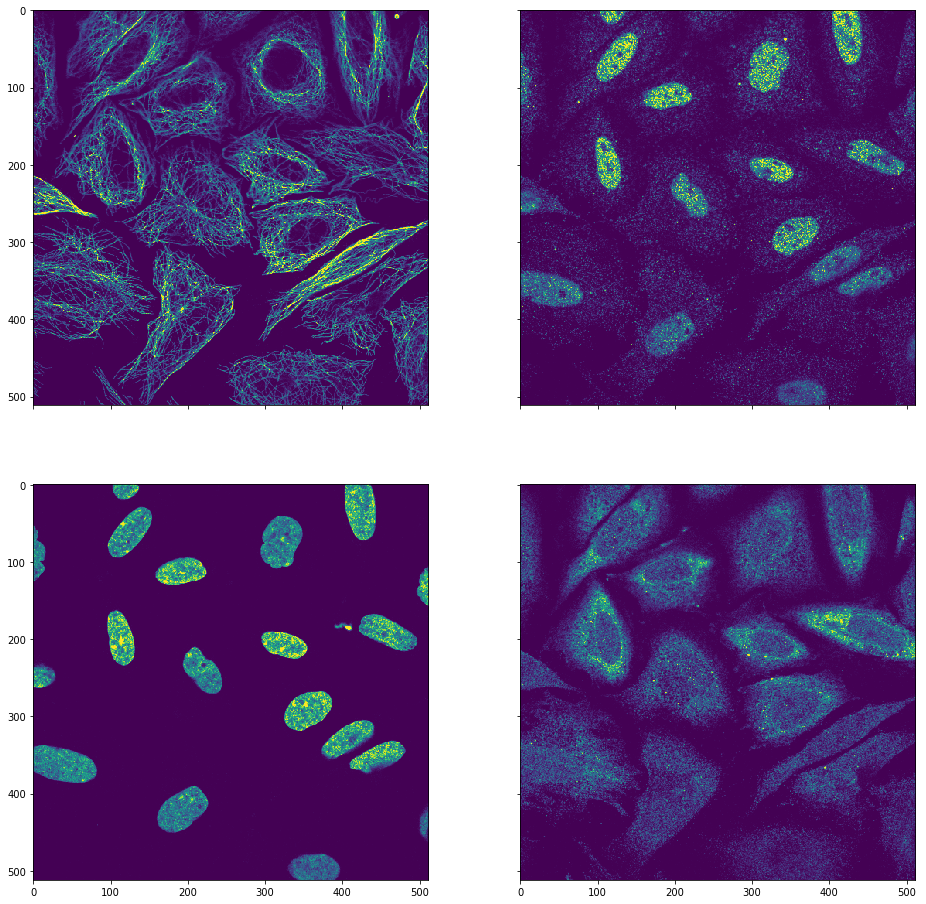

In [10]:
_, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16, 16))
for i in range(4):
    axes[i // 2, i % 2].imshow(data[125][0][:, :, i])

In [6]:
data[0]['labels']

['0', '16']

In [42]:
model = Atlas_DenseNet()

In [46]:
from utils.dataloader import ProteinDataset
data = ProteinDataset(imsize=256)
ex = data[0]
ex[0].unsqueeze(0).shape

torch.Size([1, 4, 256, 256])

In [47]:
ex[1]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
model(ex[0].unsqueeze(0)).shape

torch.Size([1, 28])

In [17]:
ex[0]

tensor([[[0.0314, 0.0353, 0.0000, 0.0000],
         [0.0000, 0.0235, 0.0000, 0.0000],
         [0.0000, 0.1059, 0.0824, 0.0000],
         ...,
         [0.0000, 0.0039, 0.0353, 0.0157],
         [0.0000, 0.0000, 0.0000, 0.0235],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0196, 0.0118, 0.0196, 0.0745],
         [0.0000, 0.0784, 0.0275, 0.0392],
         [0.0000, 0.0784, 0.0353, 0.0000],
         ...,
         [0.0353, 0.0000, 0.0000, 0.0078],
         [0.0627, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0196]],

        [[0.0000, 0.2039, 0.0471, 0.0000],
         [0.0000, 0.0588, 0.0275, 0.0000],
         [0.0000, 0.1412, 0.0549, 0.0000],
         ...,
         [0.0118, 0.0667, 0.0000, 0.0118],
         [0.0000, 0.0000, 0.0000, 0.0157],
         [0.0549, 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.0314, 0.0392, 0.0196, 0.0118],
         [0.0157, 0.0000, 0.0078, 0.0667],
         [0.0392, 0.0078, 0.0039, 0.0471],
         ...,
         [0.1176, 0.0